In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test_191269.jpg to Test_191269.jpg


In [ ]:
# Load VGG16 model
model = VGG16(weights='imagenet', include_top=True)

In [ ]:
# Load and preprocess image
img_path = "Test_191269.jpg"  # replace with your uploaded file name
img = Image.open(img_path).resize((224, 224)).convert("RGB")
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [ ]:
layer_names = ['block1_conv1', 'block2_conv1', 'block3_conv1']

def activation_maps(model, img_array, layer_names):
    activations = []
    for layer_name in layer_names:
        inter_model = tf.keras.models.Model(inputs=model.input,
                                            outputs=model.get_layer(layer_name).output)
        activations.append(inter_model.predict(img_array))
    return activations


In [ ]:

def display_activation_maps(activations, layer_names):
    for layer_name, activation in zip(layer_names, activations):
        num_filters = activation.shape[-1]
        plt.figure(figsize=(16, 8))
        plt.suptitle(f'Activation Maps - {layer_name}')
        for i in range(min(8, num_filters)):
            plt.subplot(1, 8, i+1)
            plt.imshow(activation[0, :, :, i], cmap='viridis')
            plt.axis('off')
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


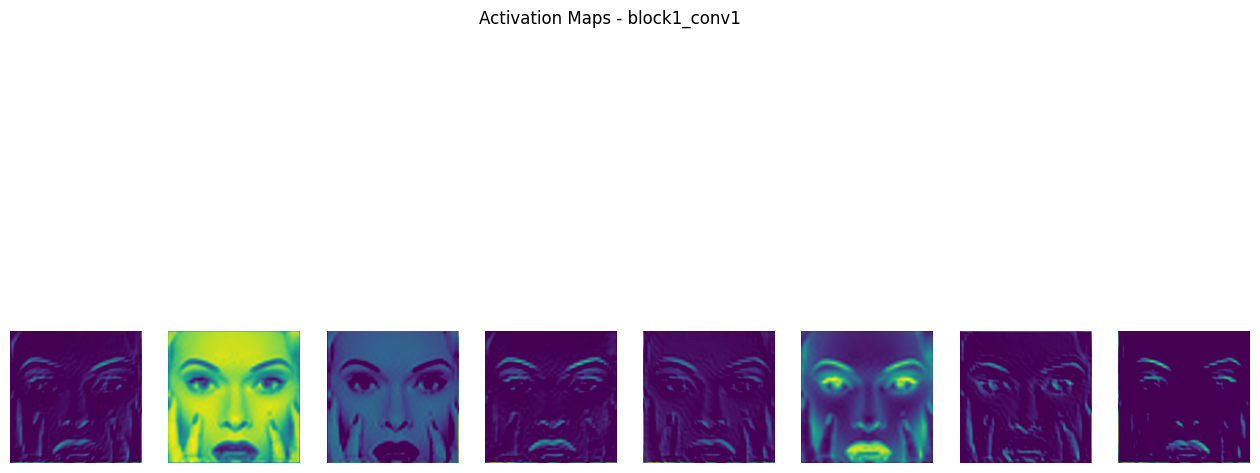

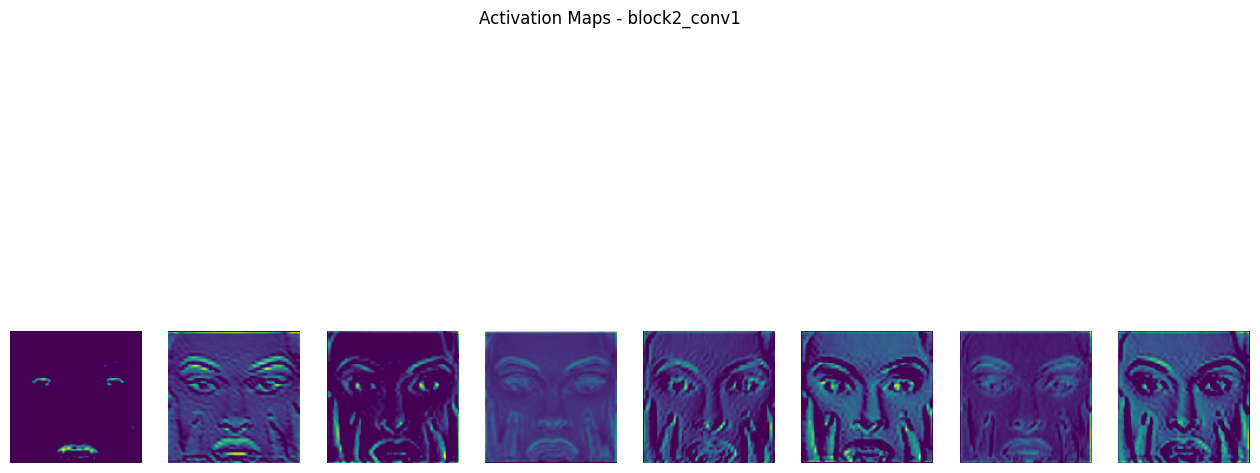

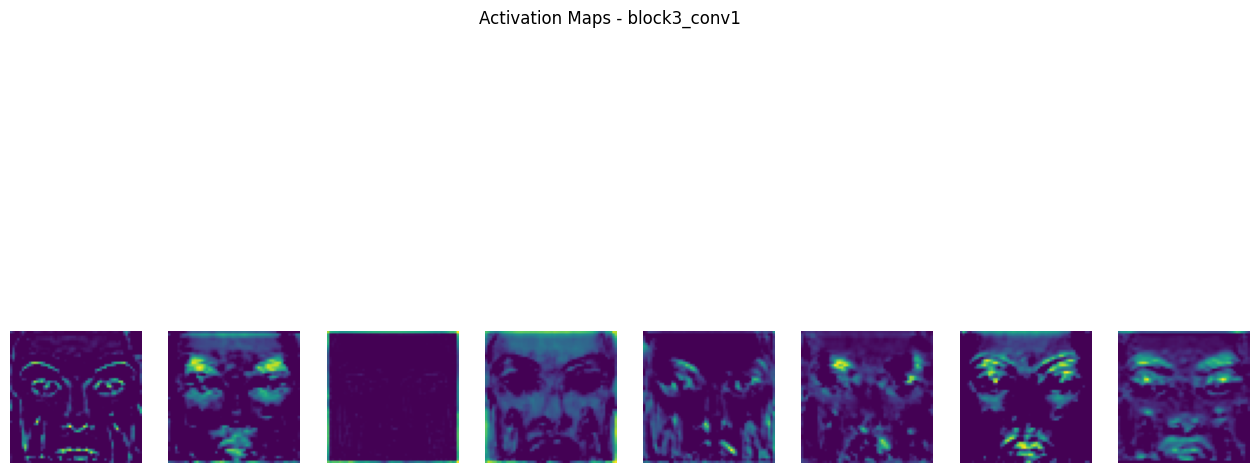

In [ ]:
# Generate and display activation maps
activations = activation_maps(model, img_array, layer_names)
display_activation_maps(activations, layer_names)